In [1]:
!pip install -Uqq fastai
!pip install -Uqq fastcore
!pip install -Uqq fastbook

In [2]:
!git clone https://github.com/urbnzazo25/fast.ai-course.git

Cloning into 'fast.ai-course'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), 931.12 KiB | 2.25 MiB/s, done.


In [3]:
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.vision.widgets import *

import warnings
warnings.filterwarnings("ignore")

import requests
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from io import BytesIO
import os

from IPython.core.display import HTML
%config Completer.use_jedi = False

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
key = "7ea52d540efa42e2a810bfbd4bb7ef84"

In [5]:
search_term = 'grizzly bear'

In [6]:
results = search_images_bing(key, search_term)
ims = results.attrgot('contentUrl')
ims

(#150) ['http://mediad.publicbroadcasting.net/p/kufm/files/styles/x_large/public/201606/grizzly_PD.jpg','http://www.news1130.com/wp-content/blogs.dir/sites/9/2015/09/17/iStock_000010656016_Double-e1442507974878.jpg','https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg','http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg','https://wallsdesk.com/wp-content/uploads/2017/01/Grizzly-Bear-full-HD.jpg','http://4.bp.blogspot.com/-2_RuGHXGm0Y/UQW3vwH37JI/AAAAAAAAEzc/Mt1seFmFrog/s1600/Grizzly-Bear-.jpg','http://4.bp.blogspot.com/-3WcCGQ1bzJI/UXcshw5QEwI/AAAAAAAAIns/gfJpUVE0FK8/s1600/Grizzly-Bear-7.jpg','https://www.tsln.com/wp-content/uploads/2018/10/bears-tsln-101318-3-1240x826.jpg','https://i.cbc.ca/1.4174820.1506608673!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_1180/grizzly-glares-at-viewer.jpg','https://tetonvalleylodge.com/wp-content/uploads/2015/04/grizzly-bear-idaho.jpg'...]

In [7]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

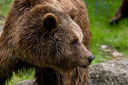

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

In [9]:
from pathlib import Path
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir()
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [10]:
fns = get_image_files(path)
fns

(#437) [Path('bears/teddy/9b9b2668-c460-4686-819f-f34029afeeac.jpg'),Path('bears/teddy/e25a42e8-099e-48cb-ad8b-c5536cbd4282.jpg'),Path('bears/teddy/44d31979-89c2-4ace-9cc2-2f99c7b52265.jpg'),Path('bears/teddy/be84dbad-6381-4e73-9fce-04c3045c7f9f.jpg'),Path('bears/teddy/d861f88f-2852-4efa-994e-53cc70fa6c14.jpg'),Path('bears/teddy/25beeee1-43c0-4724-9a45-b7436382f730.jpg'),Path('bears/teddy/5cf6d9dd-c75e-4d29-b29b-648c93857c24.jpg'),Path('bears/teddy/9d758173-1161-423b-b973-344ee0b95983.jpeg'),Path('bears/teddy/2ef8189a-da1a-4602-beb0-90c2d112282d.jpg'),Path('bears/teddy/9fc86d61-5c8c-4615-bd57-b5d7973b52bc.jpg')...]

In [11]:
failed = verify_images(fns)
failed

(#11) [Path('bears/teddy/9b9b2668-c460-4686-819f-f34029afeeac.jpg'),Path('bears/teddy/648e4338-d690-4425-965a-c2020f3187da.png'),Path('bears/teddy/a52cb166-36ff-45cc-9bd4-8ba549ec4a76.png'),Path('bears/teddy/0090274d-e09a-4d08-9d66-7ec2c6ca7c61.jpg'),Path('bears/grizzly/c15e46d3-d60b-4d45-87b7-2e5848651da7.jpg'),Path('bears/grizzly/d1b97d83-62f6-438d-bdbe-ec6f18ac3e27.jpg'),Path('bears/grizzly/544d9e06-27ac-48a8-a3ad-14b04b61b6bc.jpg'),Path('bears/grizzly/f7b876a0-7dc5-4b5e-8066-b40ac90766c4.JPG'),Path('bears/grizzly/0562d4e8-0481-4590-9719-18217b3a7a84.jpg'),Path('bears/black/ae5243b0-f9a6-4a6a-afbf-36b6f5a96677.jpg')...]

In [12]:
failed.map(Path.unlink);

In [13]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

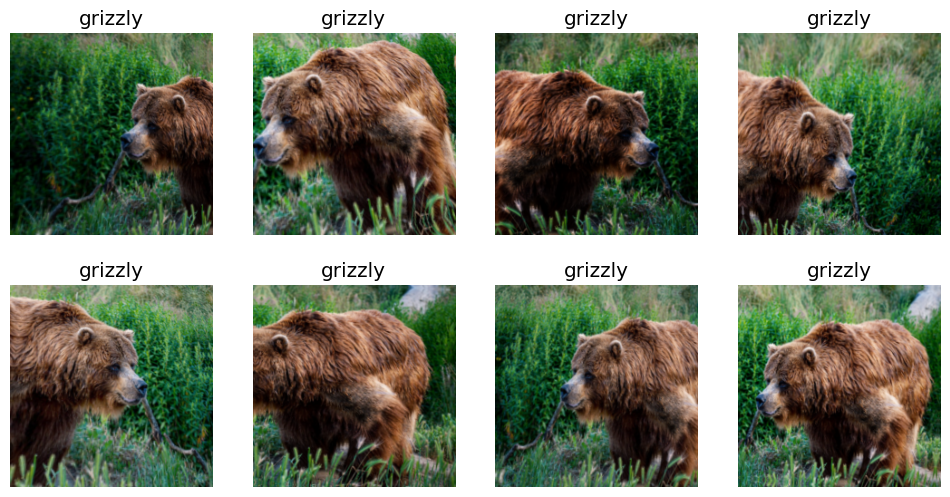

In [14]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 295MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.290715,0.073104,0.023529,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.234429,0.026694,0.011765,00:18
1,0.166135,0.020305,0.000000,00:19
2,0.121670,0.031169,0.011765,00:17
3,0.094694,0.031269,0.011765,00:17


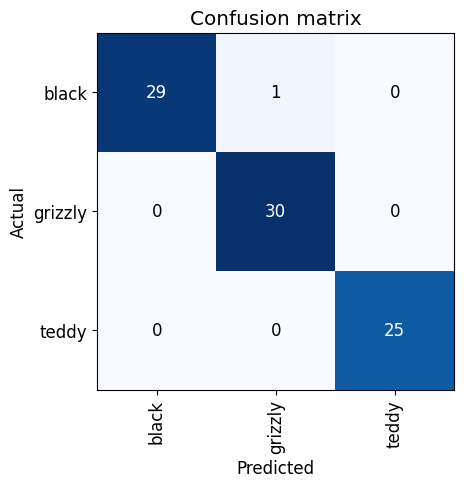

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

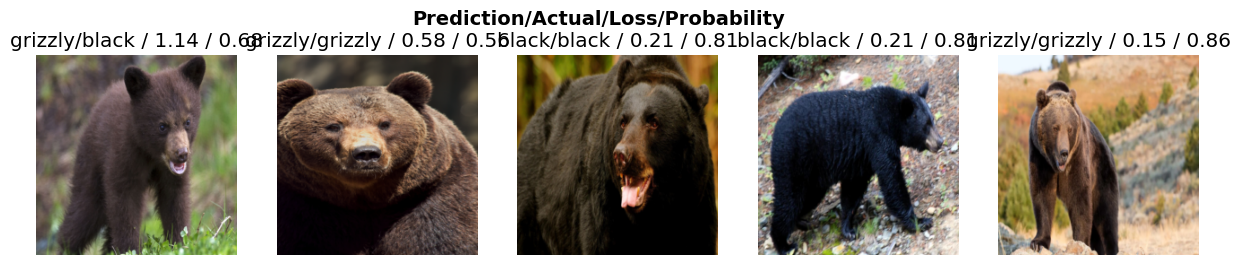

In [17]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner